In [8]:
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune


import pandas as pd

2024-02-13 23:32:58,104: Logging to /Users/evanrobert/Documents/ESDL_Research/ESDL_LSTM/neuralhydrology/runs/exploration_run_1302_233258/output.log initialized.
2024-02-13 23:32:58,105: ### Folder structure created at /Users/evanrobert/Documents/ESDL_Research/ESDL_LSTM/neuralhydrology/runs/exploration_run_1302_233258
2024-02-13 23:32:58,106: ### Run configurations for exploration_run
2024-02-13 23:32:58,106: experiment_name: exploration_run
2024-02-13 23:32:58,107: train_basin_file: ../initial_exploration/exploration_tuler
2024-02-13 23:32:58,107: validation_basin_file: ../initial_exploration/exploration_tuler
2024-02-13 23:32:58,108: test_basin_file: ../initial_exploration/exploration_tuler
2024-02-13 23:32:58,113: train_start_date: 1982-10-01 00:00:00
2024-02-13 23:32:58,116: train_end_date: 1990-09-30 00:00:00
2024-02-13 23:32:58,117: validation_start_date: 1901-10-01 00:00:00
2024-02-13 23:32:58,118: validation_end_date: 2000-09-30 00:00:00
2024-02-13 23:32:58,119: test_start_date:

Traceback (most recent call last):
  File "<string>", line 1, in <module>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/evanrobert/anaconda3/envs/ESDL/lib/python3.10/multiprocessing/spawn.py", line 116, in spawn_main
  File "/Users/evanrobert/anaconda3/envs/ESDL/lib/python3.10/multiprocessing/spawn.py", line 116, in spawn_main
  File "/Users/evanrobert/anaconda3/envs/ESDL/lib/python3.10/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/evanrobert/anaconda3/envs/ESDL/lib/python3.10/multiprocessing/spawn.py", line 126, in _main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/evanrobert/anaconda3/envs/ESDL/lib/python3.10/multiprocessing/spawn.py", line 126, in _main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/evanrobert/anaconda3/envs/ESDL/lib/python3.10/multiprocessing/spawn.py", line 126, in _

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/evanrobert/anaconda3/envs/ESDL/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_23103/712359570.py", line 1, in <module>
    start_run(config_file=Path("../initial_exploration/1_basin.yml"), gpu=-1)
  File "/Users/evanrobert/Documents/ESDL_Research/ESDL_LSTM/neuralhydrology/neuralhydrology/nh_run.py", line 76, in start_run
    start_training(config)
  File "/Users/evanrobert/Documents/ESDL_Research/ESDL_LSTM/neuralhydrology/neuralhydrology/training/train.py", line 20, in start_training
    trainer.train_and_validate()
  File "/Users/evanrobert/Documents/ESDL_Research/ESDL_LSTM/neuralhydrology/neuralhydrology/training/basetrainer.py", line 214, in train_and_validate
    self._train_epoch(epoch=epoch)
  File "/Users/evanrobert/Documents/ESDL_Research/ESDL_LSTM/neuralhydrology/neural

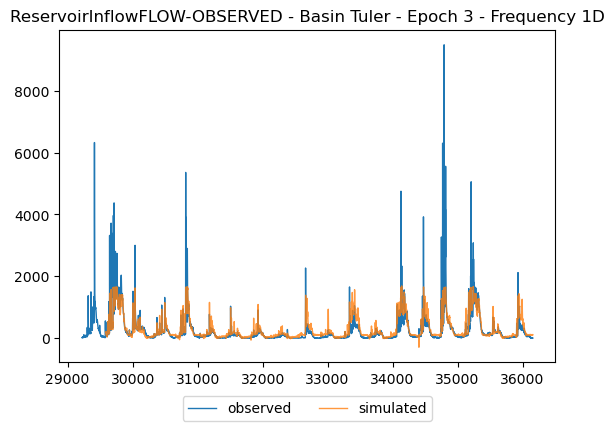

In [9]:
start_run(config_file=Path("../initial_exploration/1_basin.yml"), gpu=-1)

Evaluate on test set

In [5]:
# change directory to directory specified by above cell

run_dir = Path("runs/exploration_run_1302_231457")
eval_run(run_dir=run_dir, period="test")



2024-02-13 23:19:59,029: Using the model weights from runs/exploration_run_1302_231457/model_epoch015.pt
# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]
2024-02-13 23:19:59,699: Stored metrics at runs/exploration_run_1302_231457/test/model_epoch015/test_metrics.csv
2024-02-13 23:19:59,700: Stored results at runs/exploration_run_1302_231457/test/model_epoch015/test_results.p


Load and inspect model predictions

In [6]:
with open(run_dir / "test" / "model_epoch015" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)
    
results.keys()

dict_keys(['Tuler'])

In [7]:
results['Tuler']['1D']['xr']

<xarray.Dataset>
Dimensions:                           (date: 1461, time_step: 1)
Coordinates:
  * date                              (date) datetime64[ns] 2001-10-01 ... 20...
  * time_step                         (time_step) int64 0
Data variables:
    ReservoirInflowFLOW-OBSERVED_obs  (date, time_step) float32 3.2 1.1 ... 20.1
    ReservoirInflowFLOW-OBSERVED_sim  (date, time_step) float32 12.79 ... 10.53

In [8]:
#get output from physical model to plot with LSTM output

df = pd.read_csv('/Users/evanrobert/Documents/ESDL_Research/Training_Data_3_Basins/HMS_inflow_results_data.csv')

physical_data = df[['Date', 'ReservoirInflowFLOW']]
physical_data["Date"] = pd.to_datetime(physical_data["Date"])

start_date = '2001-10-01'
end_date = '2005-09-30'

# Filter the DataFrame to keep only the dates within the specified range
physical_data = physical_data[(physical_data['Date'] >= start_date) & (physical_data['Date'] <= end_date)]

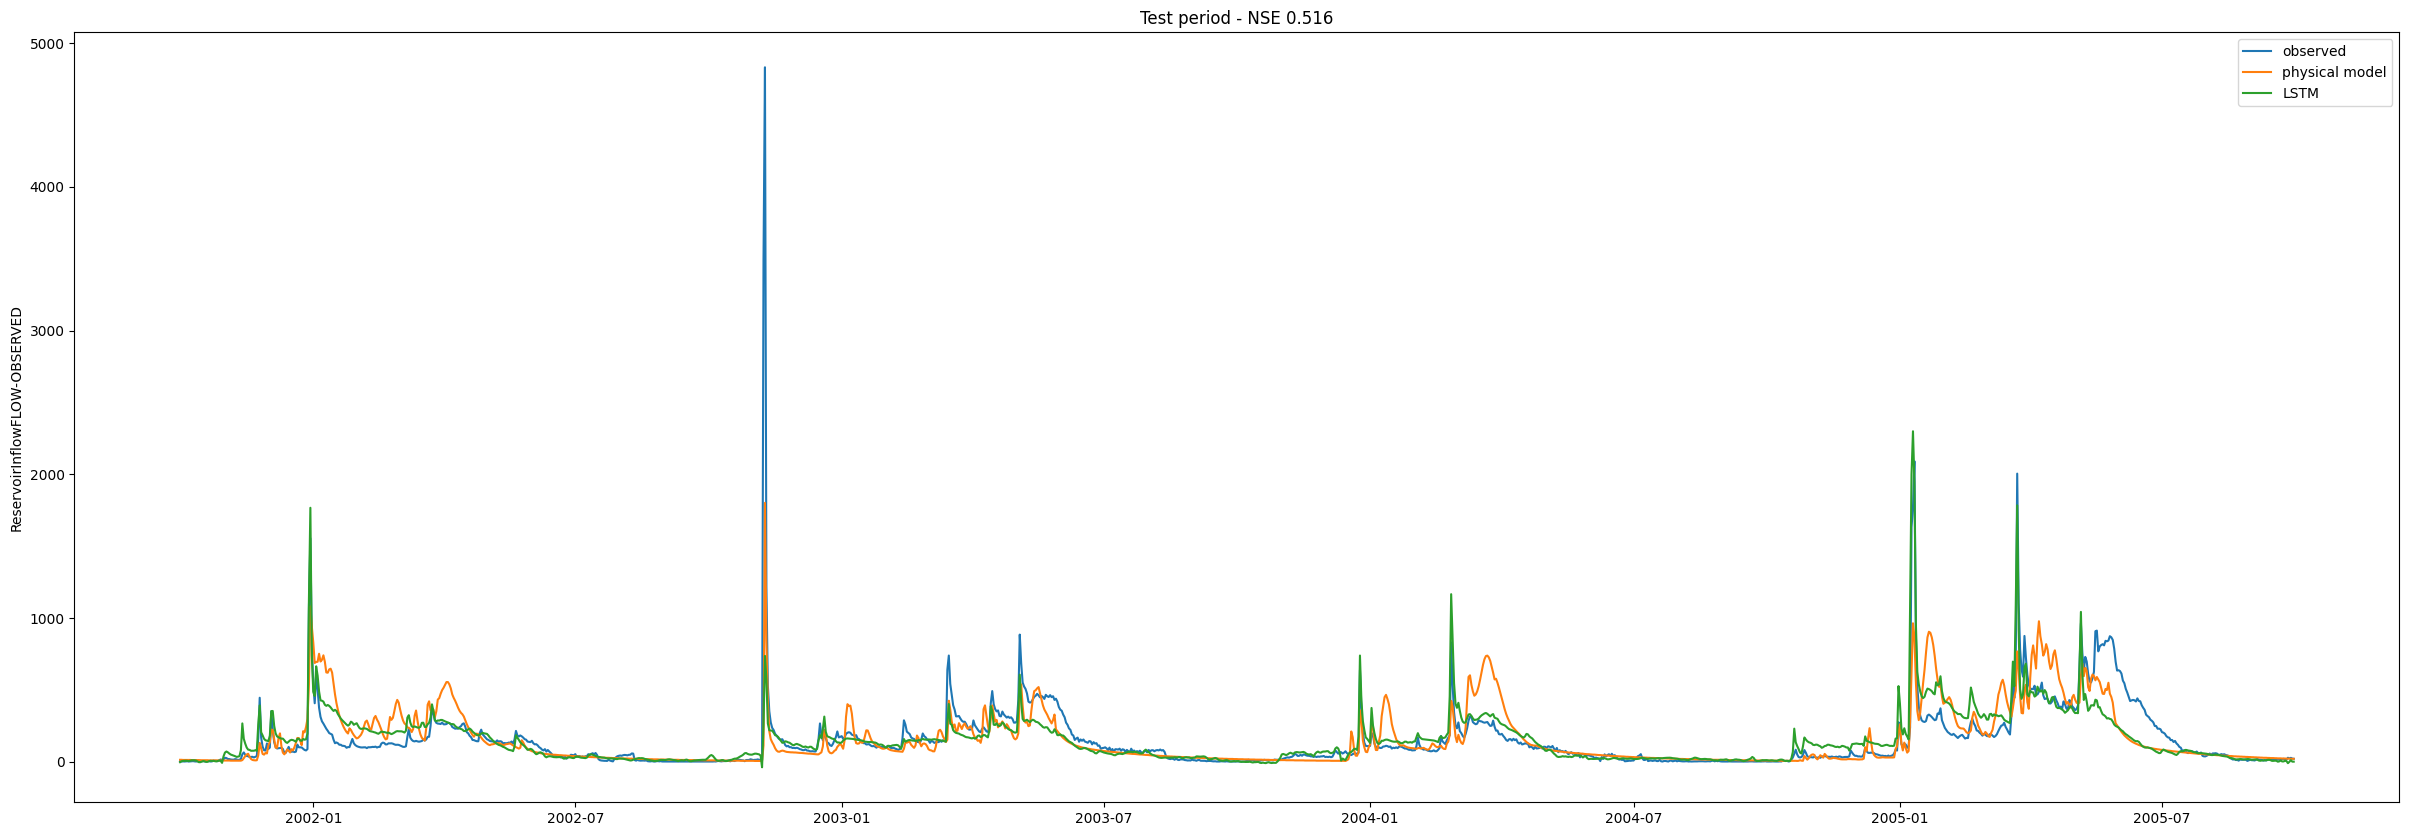

In [13]:
# extract observations and LSTM simulations
qobs = results['Tuler']['1D']['xr']['ReservoirInflowFLOW-OBSERVED_obs']
qsim = results['Tuler']['1D']['xr']['ReservoirInflowFLOW-OBSERVED_sim']

fig, ax = plt.subplots(figsize=(30,10))
ax.plot(physical_data["Date"], qobs, label = "observed")
ax.plot(physical_data["Date"], physical_data['ReservoirInflowFLOW'], label= "physical model")
ax.plot(physical_data["Date"], qsim, label = "LSTM")
ax.set_ylabel("ReservoirInflowFLOW-OBSERVED")
ax.set_title(f"Test period - NSE {results['Tuler']['1D']['NSE']:.3f}")
ax.legend()
plt.show()

